In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import StandardScaler

from mlxtend.plotting import plot_decision_regions

In [51]:
df = pd.read_csv(r"C:\Users\Jeff\Desktop\data\dados.csv.txt")
display(df.head())

,Unnamed: 0,File,bodyLength,bscr,dse,dsr,entropy,hasHttp,hasHttps,has_ip,...,numParams,numTitles,num_%20,num_@,sbr,scriptLength,specialChars,sscr,urlIsLive,urlLength
0,0,spam_dataset,31,0.064516,0,0,-4.708307,True,False,0,...,0,0,0,0,0.000000,0,2,0.000000,False,81
1,1,spam_dataset,64790,0.306050,0,0,-4.576882,True,False,0,...,0,19,0,0,0.923800,59853,19829,3.018458,False,58
2,2,spam_dataset,757,0.195509,0,0,-4.205536,True,False,0,...,0,1,0,0,0.000000,0,148,0.000000,False,46
3,3,spam_dataset,266310,0.230915,0,0,-4.550931,True,False,0,...,0,648,0,0,0.312647,83261,61495,1.353947,False,52
4,4,spam_dataset,40,0.200000,0,0,-4.689336,True,False,0,...,2,1,0,0,0.000000,0,8,0.000000,False,83


In [52]:
df.replace(True,1,inplace = True)
df.replace(False,0,inplace = True)

In [53]:
y = df["File"]
df = df.drop(columns = "File")

In [64]:
encoder = LabelEncoder()    
encoder.fit(y)    
Y = encoder.transform(y)

scaler = MinMaxScaler(feature_range=(0, 1))    
 
X = pd.DataFrame(scaler.fit_transform(df))

In [65]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [68]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [146]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)

In [147]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [148]:
y_pred = clf.predict(X_test)

In [125]:
accuracy = clf.score(X_test, y_test)
accuracy

0.9012560740808655

In [128]:
from sklearn.metrics import classification_report

In [206]:
yu = y.unique()

# Métricas do modelo KNN

In [149]:
print(classification_report(y_test, y_pred, target_names=yu))

                       precision    recall  f1-score   support

         spam_dataset       0.94      0.94      0.94      2167
Benign_list_big_final       0.85      0.79      0.82      1998
     phishing_dataset       0.92      0.96      0.94      2273
      Malware_dataset       0.89      0.91      0.90      2013
           Defacement       0.91      0.90      0.90      2456

             accuracy                           0.90     10907
            macro avg       0.90      0.90      0.90     10907
         weighted avg       0.90      0.90      0.90     10907



In [150]:
from sklearn.metrics import confusion_matrix

# Matriz confusão KNN

<AxesSubplot:>

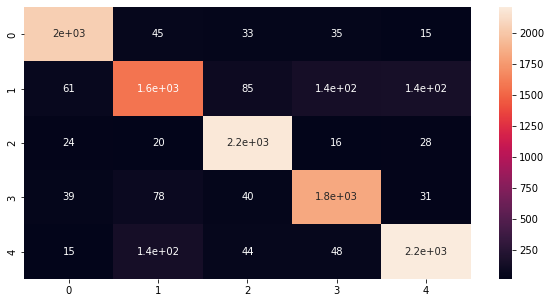

In [157]:
MC = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(MC, annot=True)

In [187]:
from sklearn.ensemble import RandomForestClassifier

In [186]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

In [189]:
rf_pred = rf.predict(X_test)

# Métricas Random Forest

In [190]:
print(classification_report(y_test, rf_pred, target_names=yu))

                       precision    recall  f1-score   support

         spam_dataset       0.99      0.98      0.98      2167
Benign_list_big_final       0.89      0.92      0.90      1998
     phishing_dataset       0.98      0.99      0.98      2273
      Malware_dataset       0.95      0.93      0.94      2013
           Defacement       0.96      0.94      0.95      2456

             accuracy                           0.95     10907
            macro avg       0.95      0.95      0.95     10907
         weighted avg       0.95      0.95      0.95     10907



# Matriz confusão Random Forest

<AxesSubplot:>

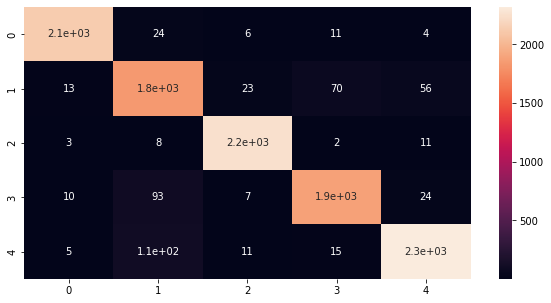

In [191]:
MC_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(10,5))
sns.heatmap(MC_rf, annot=True)